<a href="https://colab.research.google.com/github/yjodev/Tobigs19/blob/main/tobigs19_KNN_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 19기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("drive/MyDrive/투빅스/과제/blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [10]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [12]:
print("Data columns")
print("--------------------------------------------")
print(pd.DataFrame(df.info()))

Data columns
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(

## 1. 데이터 전처리

In [13]:
print(df.isnull().sum())

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64


- Product_Category_2 와 Product_Category_3 에 결측치가 많다.
- Gender, Age가 범주형 자료이다.


In [14]:
df.isnull().sum()/df.isnull().count()*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.672269
Product_Category_3            69.107643
Purchase                       0.000000
dtype: float64

- Product_Category_3은 결측치가 70%이상이므로 삭제한다. 
- User_ID와 Product_ID도 삭제한다. 

In [15]:
df = df.drop('Product_Category_3', axis=1)

## also dropping user id category 
df = df.drop('User_ID', axis=1)
df = df.drop('Product_ID', axis=1)

In [16]:
df['Marital_Status'].unique()

array([0, 1])

- Marital_Status는 0 또는 1이다. (결혼여부)

In [32]:
arr = df['Product_Category_2'].unique()
print(sorted(arr))
print(len(arr))

[17.0, nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0]
18


- Product_Category_2는 2부터 18까지의 정수이고, Nan값이 포함되어있다.
- Imputer를 이용하여 최빈값으로 대체


In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(pd.DataFrame(df['Product_Category_2']))


df['Product_Category_2'] = imputer.transform(pd.DataFrame(df['Product_Category_2']))

df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

-Product_Category_2 를 int로 변경

In [42]:
df[['Product_Category_2']] = df[['Product_Category_2']].astype('int')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      4998 non-null   object
 1   Age                         4998 non-null   object
 2   Occupation                  4998 non-null   int64 
 3   City_Category               4998 non-null   object
 4   Stay_In_Current_City_Years  4998 non-null   object
 5   Marital_Status              4998 non-null   int64 
 6   Product_Category_1          4998 non-null   int64 
 7   Product_Category_2          4998 non-null   int64 
 8   Purchase                    4998 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 519.5+ KB


## 데이터 특징 파악

In [39]:
print("average purchase for male purchasers = ",
np.mean(df['Purchase'].loc[df['Gender'] == 'M']),'\n')
print("-"*115,'\n')
print("average purchase for female purchasers = ",
np.mean(df['Purchase'].loc[df['Gender'] == 'F']))

average purchase for male purchasers =  9419.941301460824 

------------------------------------------------------------------------------------------------------------------- 

average purchase for female purchasers =  8668.8799675588


- 남성은 여성보다 비싼 물건을 산다.
- 차이가 크진 않다.

In [40]:
print('Number of Female purchasers = ',df['Gender'][df['Gender'] == 'F'].count())
print('Number of male purchasers   = ',df['Gender'][df['Gender'] == 'M'].count())

Number of Female purchasers =  1233
Number of male purchasers   =  3765


- 남성 구매자는 여성보다 많다.
- 차이는 3배 이상이다.

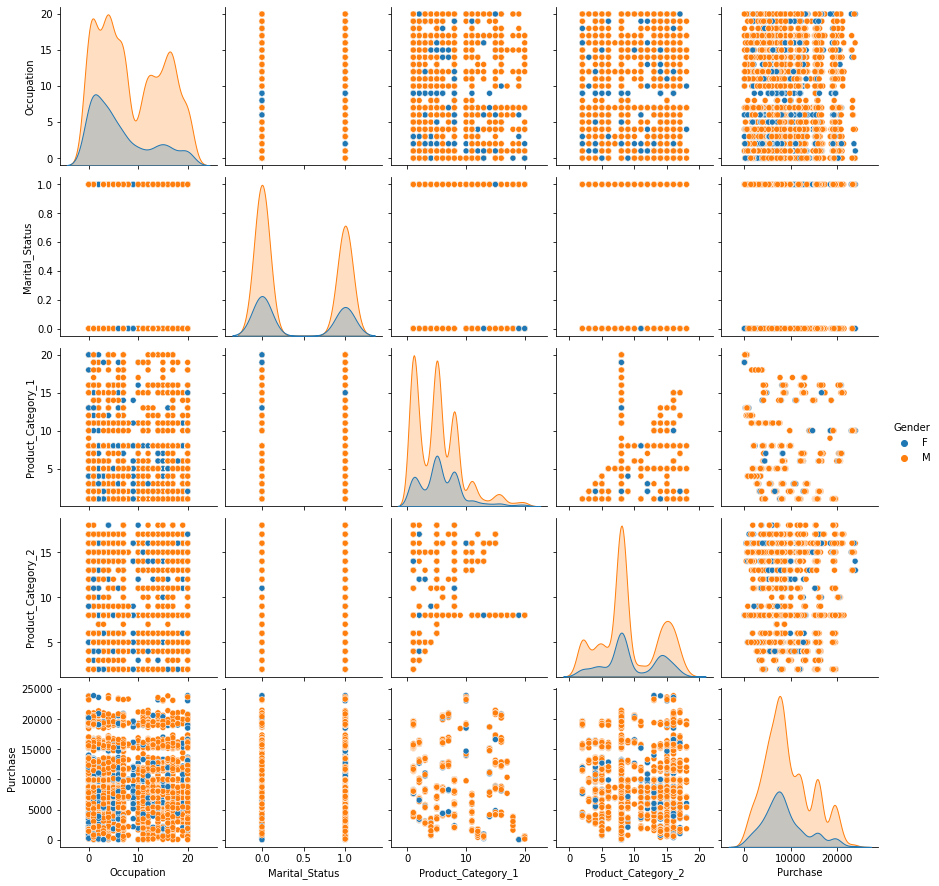

In [41]:
sns.pairplot(df, hue = "Gender")
plt.show()

In [67]:
#범주형 변수에 대해 One-Hot Encoding

from sklearn.preprocessing import OneHotEncoder, StandardScaler

cats = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

encoder = OneHotEncoder().fit(df[cats]) 
endcoded_data = pd.DataFrame(encoder.transform(df[cats]).toarray(), index = df.index,
                             columns = encoder.get_feature_names(cats)) 
data = pd.concat([df, endcoded_data], sort = False, axis = 1).drop(cats, axis = 1)
data

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,5,17,2010,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,10,0,7,8,4483,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10,0,1,4,7696,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10,0,2,4,16429,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10,0,3,5,5780,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,7,1,1,16,11701,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4994,1,1,8,8,2045,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4995,13,1,1,6,4505,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4996,0,1,12,8,1413,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## 4. 스케일링

In [89]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data)

## 5. 데이터 분리

In [99]:
#train 0.7,  test set 0.3
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, train_size=0.7)

In [100]:
print(len(train_df))
print(len(test_df))

3498
1500


In [101]:
train_df

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
3628,16,1,5,8,6923,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3413,16,0,5,8,8783,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
565,2,0,4,5,2778,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3359,7,0,1,16,7861,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3446,2,0,5,8,8778,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,16,0,1,2,15820,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
855,4,0,4,9,3487,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4169,19,0,12,8,1434,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4501,20,1,2,8,13146,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Target 은 Product_Category_1로 설정

In [103]:
train_target = train_df['Product_Category_1']
test_target = test_df['Product_Category_1']
train_data = train_df.drop('Product_Category_1', axis=1)
test_data = test_df.drop('Product_Category_1', axis=1)

In [104]:
train_target.head()

3628    5
3413    5
565     4
3359    1
3446    5
Name: Product_Category_1, dtype: int64

In [105]:
train_data.head()

,Occupation,Marital_Status,Product_Category_2,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
3628,16,1,8,6923,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3413,16,0,8,8783,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
565,2,0,5,2778,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3359,7,0,16,7861,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3446,2,0,8,8778,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 6. Fitting

In [73]:
#knn 시작
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

In [74]:
#그리드서치를 위한 파라미터 설정
params_1 = {
    "n_neighbors": [i for i in range(1, 20, 2)],
    "p": [1, 2], #1은 맨하탄, 2는 유클리드
    "weights": ['uniform']
}
params_1

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'p': [1, 2],
 'weights': ['uniform']}

In [75]:
grid_cv = GridSearchCV(knn, param_grid = params_1, cv = 3)

In [106]:
grid_cv.fit(train_data, train_target)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2], 'weights': ['uniform']})

In [107]:
grid_cv.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [108]:
knn_1 = KNeighborsClassifier(n_neighbors = 5, p = 1, weights = 'uniform')
knn_1.fit(train_data, train_target)

KNeighborsClassifier(p=1)

In [109]:
#예측 진행
test_pred = knn_1.predict(test_data)

In [110]:
knn_1.score(train_data,train_target)

0.8827901658090337

## 6.평가

In [112]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("test_data accuracy : ", accuracy_score(test_target, test_pred))
print("score :", knn_1.score(train_data,train_target))

test_data accuracy :  0.8513333333333334
score : 0.8827901658090337


80%대의 준수한 성능을 보인다.